In [5]:
import plot_tools as pt
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [6]:
rseed = random.seed(0)

In [54]:
q = 0.000
a = 0.03
b = 0.3
xm = 0.5
yc = 1.0
mu = 0.0
sig = 0.05
testf = lambda x: q*(x - xm)**4 + a*(x - xm)**3 + b*(x - xm)**2 + \
                  np.array([random.gauss(mu+yc,sig) for xi in x])

<Container object of 3 artists>

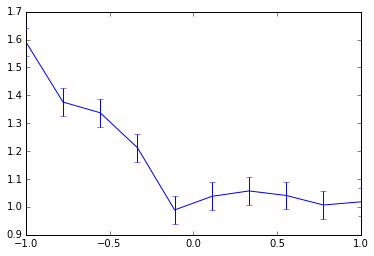

In [55]:
dom = np.linspace(-1,1,10)
dat = {'x':dom,
       'y':testf(dom),
       'e':np.zeros(len(dom))+sig}
plt.errorbar(dat['x'],dat['y'],dat['e'])

Error: [-0.10657645 -0.20039668  0.11120512  0.01423013]
Statistical error estimate: [ 0.0819809   0.21769029  0.33956316  0.02808597]


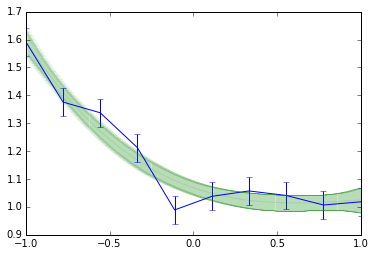

In [60]:
reload(pt)
myfit = pt.CubicFit()
myfit.fit(dat,'x','y','e',a,b,xm,yc)
dom = np.linspace(-1,1,1000)
plt.errorbar(dat['x'],dat['y'],dat['e'])
plt.errorbar(dom,myfit.eval(dom),myfit.eval_error(dom),alpha=0.1)
print "Error:",myfit.parm - np.array((a,b,xm,yc))
print "Statistical error estimate:",myfit.perr